# Run successive simulation

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# run rotation
os.chdir(r"E:\material\STICS_training\JavaSTICS-1.41-stics-9.1")
os.system(r'JavaSticsCmd.exe %s %s %s' % ('--run-successive', 'E:\material\STICS_training\WQfertilizer',
                                          'WM_N0_W2014 WM_N0_M2015 WM_N0_W2015 WM_N0_M2016 WM_N0_W2016 WM_N0_M2017 \
                                          WM_N0_W2017 WM_N0_M2018 WM_N0_W2018 WM_N0_M2019'))
os.system(r'JavaSticsCmd.exe %s %s %s' % ('--run-successive', 'E:\material\STICS_training\WQfertilizer',
                                          'WM_N1_W2014 WM_N1_M2015 WM_N1_W2015 WM_N1_M2016 WM_N1_W2016 WM_N1_M2017 \
                                          WM_N1_W2017 WM_N1_M2018 WM_N1_W2018 WM_N1_M2019'))
os.system(r'JavaSticsCmd.exe %s %s %s' % ('--run-successive', 'E:\material\STICS_training\WQfertilizer',
                                          'WM_N2_W2014 WM_N2_M2015 WM_N2_W2015 WM_N2_M2016 WM_N2_W2016 WM_N2_M2017 \
                                          WM_N2_W2017 WM_N2_M2018 WM_N2_W2018 WM_N2_M2019'))
os.system(r'JavaSticsCmd.exe %s %s %s' % ('--run-successive', 'E:\material\STICS_training\WQfertilizer',
                                          'WM_N3_W2014 WM_N3_M2015 WM_N3_W2015 WM_N3_M2016 WM_N3_W2016 WM_N3_M2017 \
                                          WM_N3_W2017 WM_N3_M2018 WM_N3_W2018 WM_N3_M2019'))
os.system(r'JavaSticsCmd.exe %s %s %s' % ('--run-successive', 'E:\material\STICS_training\WQfertilizer',
                                          'WM_N4_W2014 WM_N4_M2015 WM_N4_W2015 WM_N4_M2016 WM_N4_W2016 WM_N4_M2017 \
                                          WM_N4_W2017 WM_N4_M2018 WM_N4_W2018 WM_N4_M2019'))

0

# Report results read
以14-18年氮肥地为例（这里管理参数直接改的轮作地的，可能跟氮肥地有些差异，这里只是用默认参数试下效果），目前默认参数来跑年际间差异很大（这里极有可能是管理哪里有问题了，也可能是参数问题，后期再仔细确定）

<AxesSubplot:xlabel='year', ylabel='N_accumulate'>

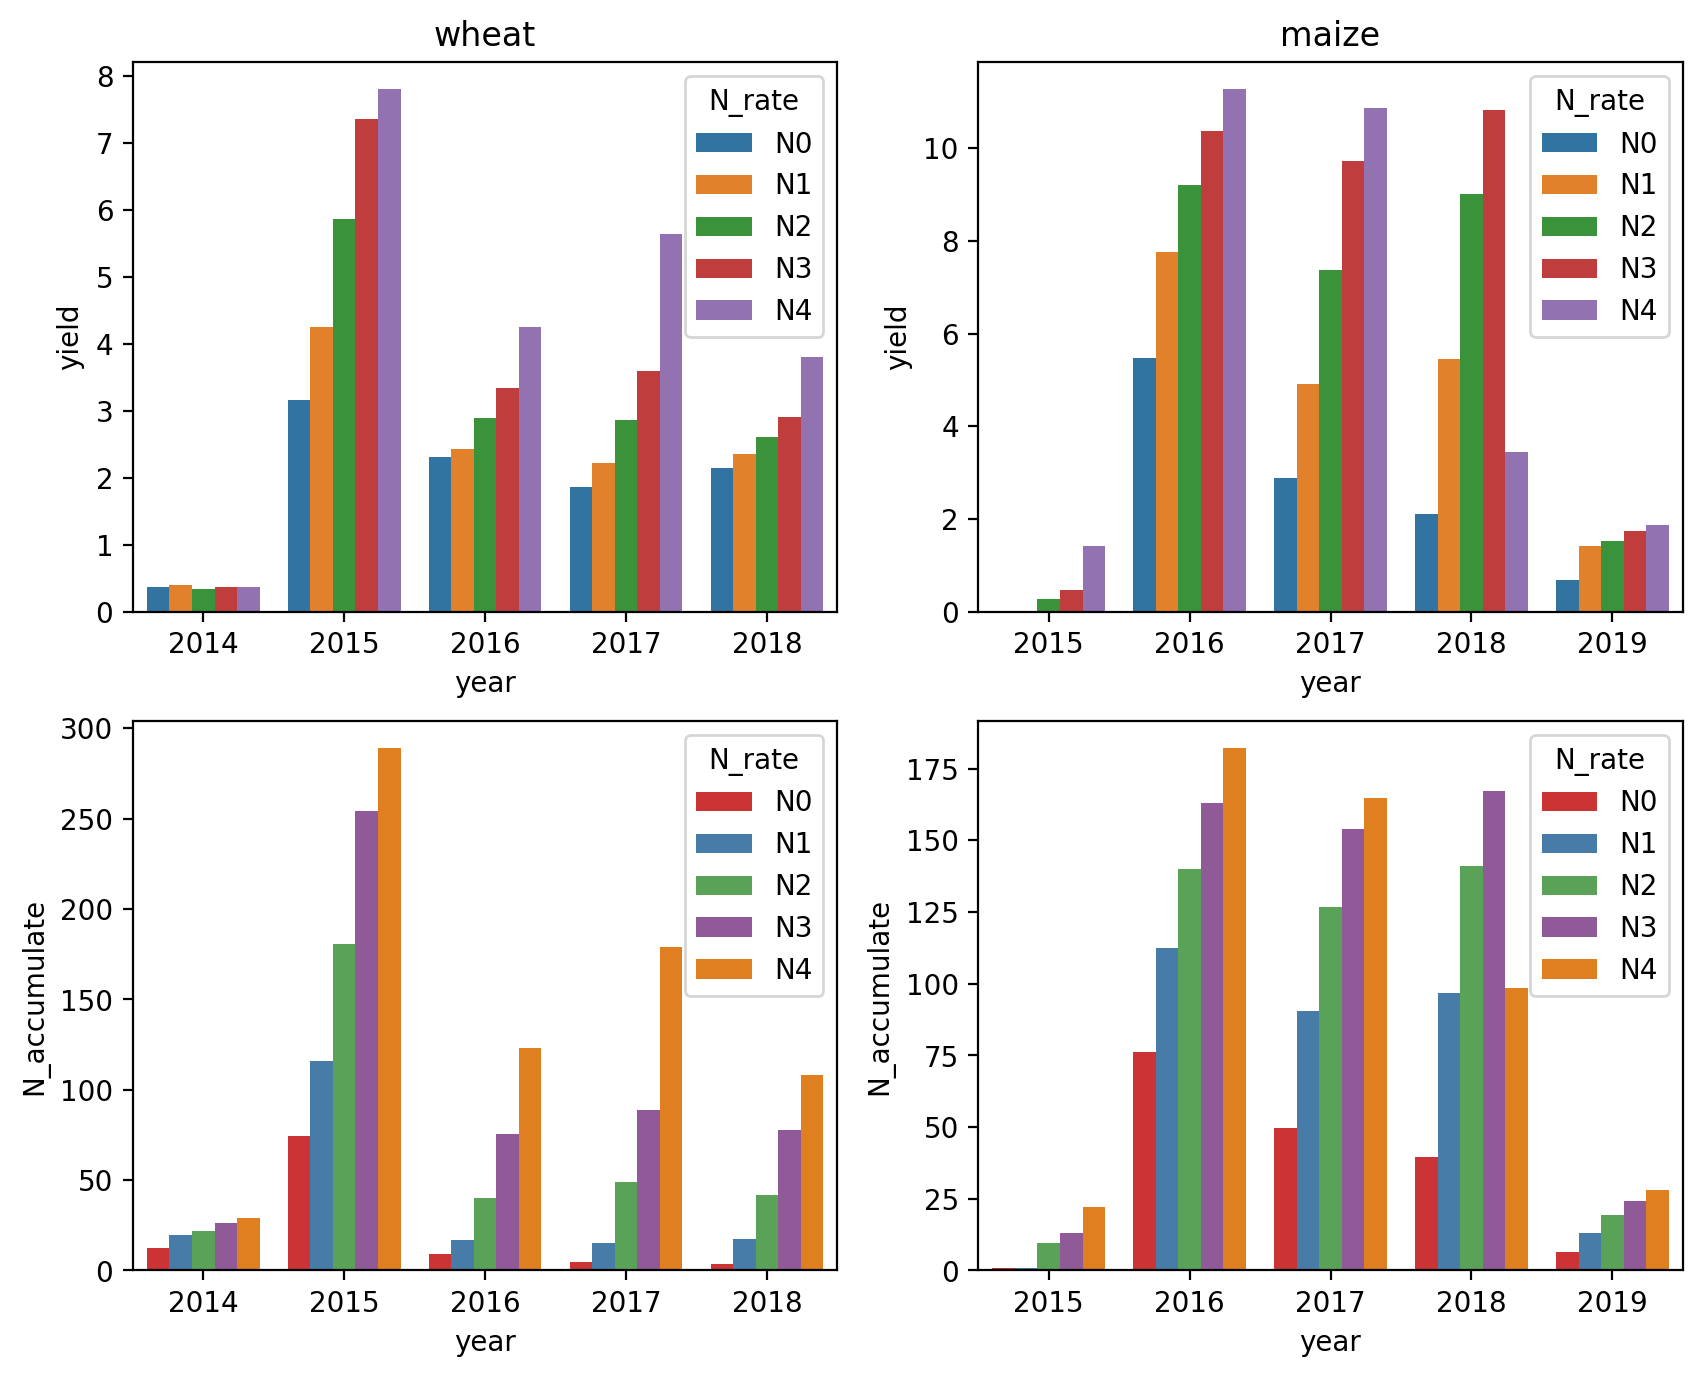

In [2]:
# report results
summary = pd.read_csv(r'E:\material\STICS_training\WQfertilizer\mod_rapport.sti', sep=';', index_col=False).drop_duplicates(keep=False)
summary.reset_index(inplace=True)
summary['year'] = summary['ansemis'].apply(int)
summary['yield'] = summary['mafruit'].apply(float)
summary['N_accumulate'] = summary['QNplante'].apply(float)
summary['N_rate'] = [summary['P_usm'][i].split('_')[1] for i in range(len(summary))]
summary_wheat = summary.query("P_codeplante == 'ble'")
summary_maize = summary.query("P_codeplante == 'mai'")
# plot
fig = plt.figure(figsize=(10, 8), dpi= 200)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
b1 = sns.barplot(x="year", y="yield", hue="N_rate", data=summary_wheat, ax=ax1)
ax1.set_title('wheat')
b2 = sns.barplot(x="year", y="yield", hue="N_rate", data=summary_maize, ax=ax2)
ax2.set_title('maize')
sns.barplot(x="year", y="N_accumulate", hue="N_rate", data=summary_wheat, ax=ax3, palette='Set1')
sns.barplot(x="year", y="N_accumulate", hue="N_rate", data=summary_maize, ax=ax4, palette='Set1')

# Daily output read
以下是读取模型每日输出，绘制模型输出结果的程序,以16年N0为例

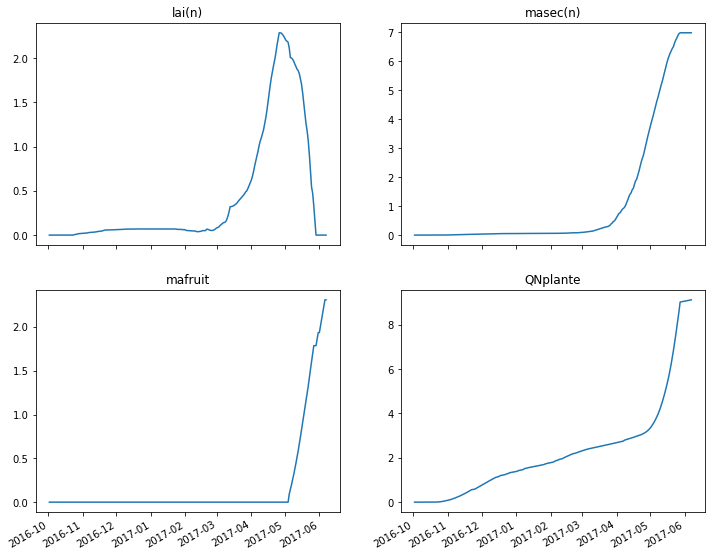

In [3]:
import pandas as pd
import os
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# data read
file_dir = r'E:\material\STICS_training\WQfertilizer'
output_name = 'mod_sWM_N0_W2016.sti'
output = pd.read_csv(os.path.join(file_dir, output_name), sep=';', index_col=False)
output['date'] = [dt.date(output['ian'][i], output['mo'][i], output['jo'][i]) for i in range(len(output))]
# plot figures
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["lai(n)", "masec(n)", "mafruit", "QNplante"], axes.flatten()):
    ax.plot_date(output.date, output[var], '-')
    ax.set_title(var)
fig.autofmt_xdate()

# Effects of parameters
未来确定某个参数的效应，可以使参数在一定范围内变动，探究其不确定性，以便于后期调参，以及加强对参数的理解。以下以udlaimax从1-4间隔0.4变化为例测试参数的效果。

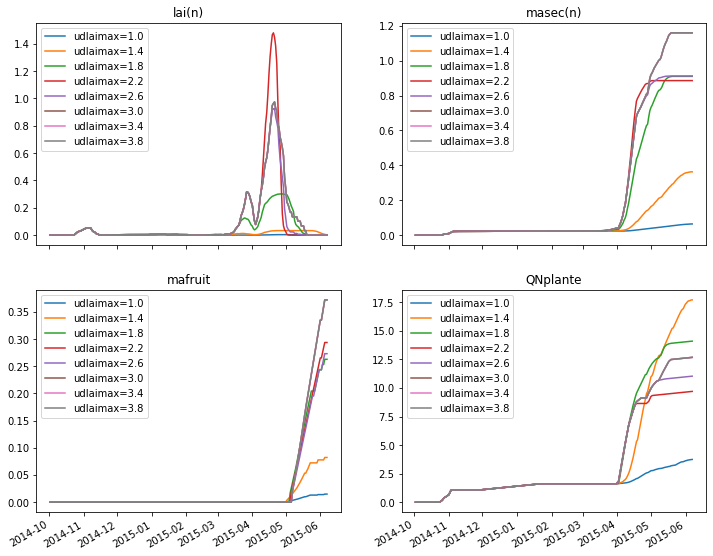

In [4]:
import pandas as pd
import numpy as np
import os
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from xml.dom.minidom import parse


# parameters range
udlaimax_range = np.arange(1, 4, 0.4)
# build figures
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# change parameter
for udlaimax in udlaimax_range:
    DOMTree = parse(r'E:\material\STICS_training\JavaSTICS-1.41-stics-9.1\plant\wheatnew_plt.xml')
    fich_list = DOMTree.documentElement
    leaves = fich_list.getElementsByTagName('formalisme')[4]
    leaves.getElementsByTagName('param')[10].childNodes[0].data = udlaimax  
    # change param
    with open(r'E:\material\STICS_training\JavaSTICS-1.41-stics-9.1\plant\wheatnew_plt.xml', 'w') as f:
        fich_list.writexml(f)
    # run model
    os.chdir(r"E:\material\STICS_training\JavaSTICS-1.41-stics-9.1")
    os.system(r'JavaSticsCmd.exe --run E:\material\STICS_training\WQfertilizer WM_N0_W2014')
    # plot
    file_dir = r'E:\material\STICS_training\WQfertilizer'
    output_name = 'mod_sWM_N0_W2014.sti'
    output = pd.read_csv(os.path.join(file_dir, output_name), sep=';', index_col=False)
    output['date'] = [dt.date(output['ian'][i], output['mo'][i], output['jo'][i]) for i in range(len(output))]
    for var, ax in zip(["lai(n)", "masec(n)", "mafruit", "QNplante"], axes.flatten()):
        ax.plot_date(output.date, output[var], '-', label='udlaimax=%.1f'%udlaimax)
        ax.set_title(var)
        ax.legend()
    fig.autofmt_xdate()

# Transform between date and Julian day

In [5]:
from datetime import datetime


def d_to_jd(time):
    fmt = '%d-%m-%Y'
    dt = datetime.strptime(time, fmt)
    tt = dt.timetuple()
    return tt.tm_yday


def jd_to_time(time):
    year = int(time[:4])
    day = int(time[4:])
    if day > 365:
        day = day - 365
        year += 1
        time = str(year) + str(day)        
    dt = datetime.strptime(time, '%Y%j').date()
    fmt = '%Y/%m/%d'
    return dt.strftime(fmt)
# d_to_jd('7-8-2015')
jd_to_time('2015159')

'2015/06/08'